# **Projet IAS** (Introduction à l'Apprentissage Statistique)

---
## Liste des étudiants
* NOM1, Prénom1: MAQUET, Baptiste
* NOM2, Prénom2: TRISTAN, Jéromin
* NOM3, Prénom3: MANOUNOU, Reine
* NOM4, Prénom4: AIT MOUFFOK, Letitia
* NOM5, Prénom5: VINCENT, Maxime

# Importations des librairies

In [1]:
# Manipulation de tableau
import numpy as np

# Manipulation des données
import pandas as pd

# Visulatisation
import matplotlib.pyplot as plt
import seaborn as sns

# Cross-validation
from sklearn.model_selection import train_test_split

# Méthode de réduction dimensionnelle
from sklearn.decomposition import PCA

# Modèles d'apprentissage
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Métrique de score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Grille de recherche d'hyperparamètres
from sklearn.model_selection import GridSearchCV

In [2]:
# Chargement des données
data = pd.read_csv('data/data.csv')
feature = data.columns
print(feature)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


# Première visualisation des données

In [3]:
data.shape # (Nombre de lignes * Nombre de colonnes)

(174389, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [5]:
data.isnull().sum() # Aucune valeur Null

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [6]:
data.isna().sum() # Aucun NaN

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

<p style='color:blue'>Toute donées sont conformes, il n'y a aucun Null et aucun Nan. On compte 174389 lignes pour 19 colonnes.</p>

In [7]:
#Visualisation des données
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


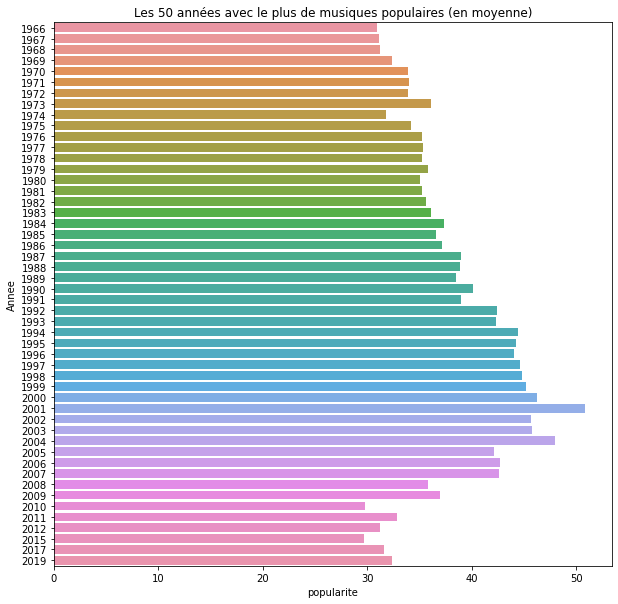

In [8]:
fig, ax = plt.subplots(figsize = (10, 10))
year = data.groupby('year')['popularity'].mean().sort_values(ascending=False).head(50)
ax = sns.barplot(x=year.values, y=year.index, orient="h", ax=ax)
ax.set_xlabel('popularite')
ax.set_ylabel('Annee')
ax.set_title('Les 50 années avec le plus de musiques populaires (en moyenne)')
plt.show()

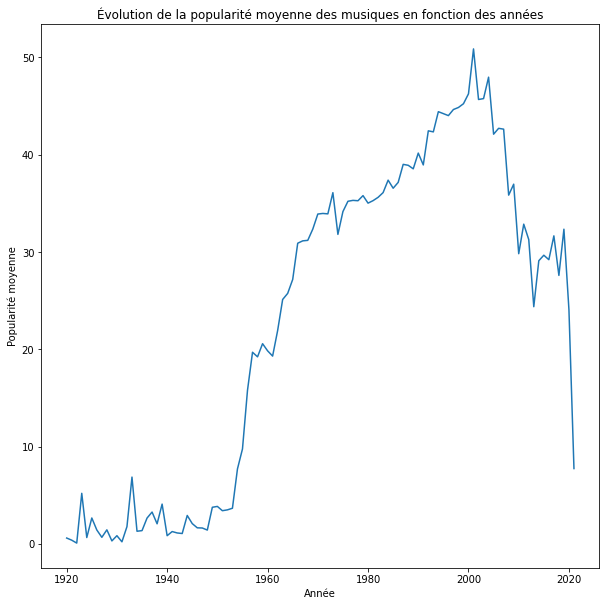

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = data.groupby('year')['popularity'].mean().plot()
ax.set_title('Évolution de la popularité moyenne des musiques en fonction des années')
ax.set_ylabel('Popularité moyenne')
ax.set_xlabel('Année')
plt.show()

<p style="color:blue">L'intérêt de faire le calcul en moyenne c'est d'éviter un biais qui pourrait être une
sur-production de musiques une année. Avec cette méthode, on s'aperçoit que l'année 2001 fut l'année avec le plus de musiques populaires en moyenne.</p>

<AxesSubplot:>

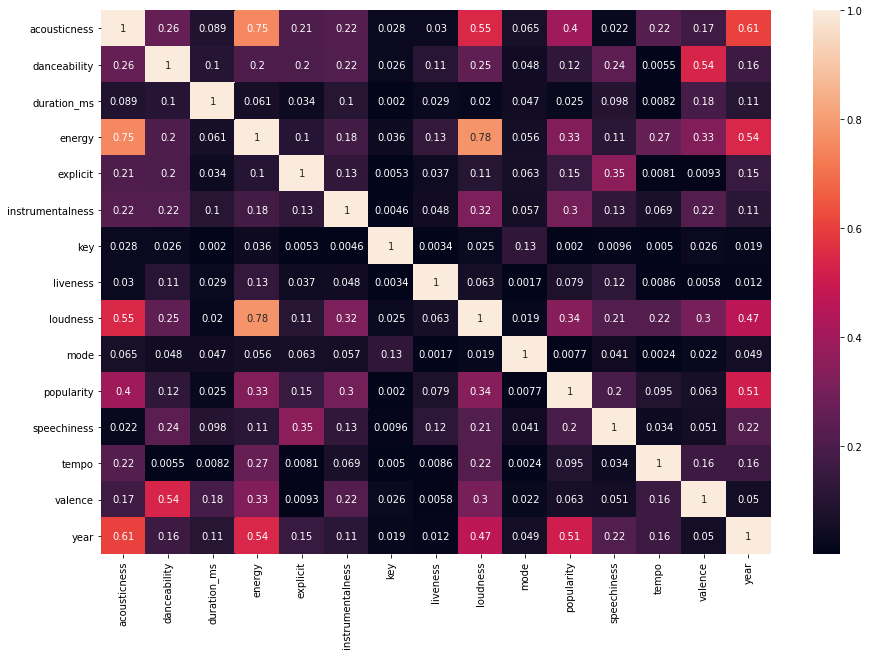

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(abs(data.corr()),annot=True)

<p style='color:blue'>Nous avons pris la valeur absolue de la matrice de corrélation afin d'avoir un dégradé plus visuel. Les nombres négatifs rendaient la matrice moins lisible. Or il s'agit simplement d'une corrélation inversée quand un nombre est négatif. On remarque que quelques rares features sont fortement corrélées. Par exemple&nbsp;: Corr(energy, loudness)=0.78, Corr(energy, acousticness)=0.75. Cependant, nous n'avons pas fusionné à la main les features et par la suite nous utilisons la PCA pour effectuer une réduction dimensionnelle automatiquement.</p>

# Pré-processing des données

<p style='color:blue'>On affiche le nombre de points de données uniques.</p>

In [11]:
for c in feature:
    print(c + ": " + str(data[c].nunique()) + " uniques")

acousticness: 4929 uniques
artists: 36195 uniques
danceability: 1233 uniques
duration_ms: 56306 uniques
energy: 2306 uniques
explicit: 2 uniques
id: 172230 uniques
instrumentalness: 5400 uniques
key: 12 uniques
liveness: 1740 uniques
loudness: 25580 uniques
mode: 2 uniques
name: 137013 uniques
popularity: 98 uniques
release_date: 11043 uniques
speechiness: 1633 uniques
tempo: 84123 uniques
valence: 1707 uniques
year: 102 uniques


In [12]:
print(data[['year', 'release_date']])

        year release_date
0       1920         1920
1       1920   1920-01-05
2       1920         1920
3       1920   1920-01-01
4       1920   1920-10-01
...      ...          ...
174384  2020   2020-12-25
174385  2021   2021-01-22
174386  2020   2020-12-09
174387  2021   2021-01-07
174388  2020   2020-12-09

[174389 rows x 2 columns]


<p style='color:blue'>La feature "release_date" est juste une précision de la feature "year". On observe aussi quelle n'est pas tout le temps sous le même format. C'est donc une donnée inconsistante et redondante, ce qui implique que l'on peut la supprimer.</p>

In [13]:
#Suppression colonnes: id, name, release_date, artists
data = data.drop(['id', 'name', 'release_date', 'artists'], axis=1)

<p style='color:blue'>On supprime la colonne id car c'est un identifiant unique qui n'est présent que pour les besoins de la base de données en tant que clé primaire. On ne tirera rien de la colonne name car ce n'est pas une donnée catégorielle. Mise à part si on effectue une méthode de TAL (Traitement Automatique des Langues), mais ce n'est pas notre sujet. Enfin, la feature 'artists' pourrait être transformée en la moyenne de popularité de l'artiste, mais pour des raisons de simplicité, on supprime cette colonne.</p>

In [14]:
feature = feature.drop(['id', 'name', 'release_date', 'artists'])
print(feature)

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')


<p style='color:blue'>On convertit les millisecondes en secondes pour la durée des musiques, afin d'y voir plus clair.</p>

In [15]:
# Changement d'échelle
data['duration_ms'] = (data['duration_ms'] / 1000.0).astype(np.int64)

In [16]:
# Renommage colonne duration_ms : duration_s
data.rename(columns={'duration_ms':'duration_s'})

,acousticness,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,0.598,168,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.643000,0.852,150,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
2,0.993000,0.647,163,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
3,0.000173,0.730,422,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
4,0.295000,0.704,165,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,0.792,147,0.866,0,0.000060,6,0.1780,-5.089,0,0,0.0356,125.972,0.1860,2020
174385,0.795000,0.429,144,0.211,0,0.000000,4,0.1960,-11.665,1,0,0.0360,94.710,0.2280,2021
174386,0.806000,0.671,218,0.589,0,0.920000,4,0.1130,-12.393,0,0,0.0282,108.058,0.7140,2020
174387,0.920000,0.462,244,0.240,1,0.000000,0,0.1130,-12.077,1,69,0.0377,171.319,0.3200,2021


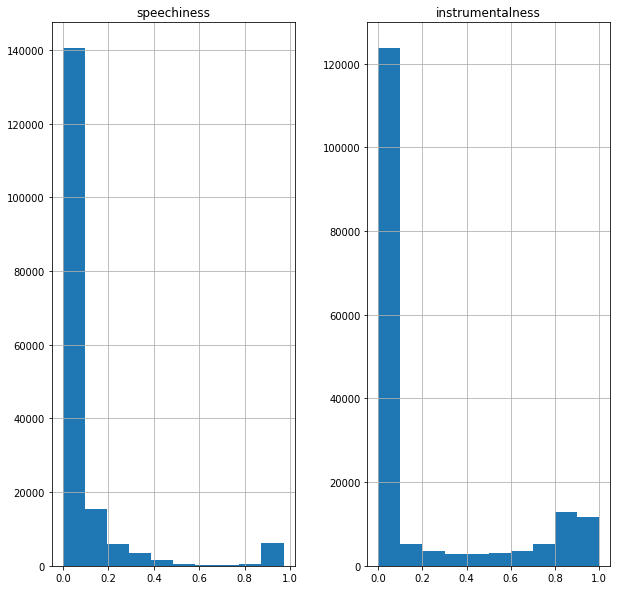

In [17]:
data[['speechiness', 'instrumentalness']].hist(figsize=(10, 10))
plt.show()

<p style='color:blue'>Les features speechness et instrumentalness sont pour la plupart des cas soit vers 0 soit vers 1, on décide donc de les binariser.</p>

In [18]:
#Binarisation speechiness
data['speechiness'] = (data['speechiness']>0.5).astype(int)

In [19]:
#Binarisation instrumentalness
data['instrumentalness'] = (data['instrumentalness']>0.5).astype(int)

<p style='color:blue'>On supprime les dupliqués car les données redondantes n'apportent rien mise à part des temps de calcul allongés et un biais de sur-représentation.</p>

In [20]:
# Nombre de dupliqués
data.duplicated().sum() 

3641

In [21]:
# Suppresion doublons
data = data.drop_duplicates()

# Réduction dimensionnelle par PCA (Principal Component Analysis)

<p style='color:blue'>On sépare les données en 3 sous-ensembles&nbsp;: l'apprentissage (60%), la validation (30%) et le test (10%).</p>

In [22]:
# Séparation des données pour la cross-validation
X_train, X_valid, y_train, y_valid = train_test_split(data.drop('popularity', axis=1),
                                         data['popularity'],
                                         test_size = 0.3,
                                         random_state = 8623)
X_train, X_test, y_train, y_test = train_test_split(X_train,
                                         y_train,
                                         test_size = 0.1,
                                         random_state = 8623)
print('X_train: ', X_train.shape)
print('X_valid: ', X_valid.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_valid: ', y_valid.shape)
print('y_test: ', y_test.shape)

X_train:  (107570, 14)
X_valid:  (51225, 14)
X_test:  (11953, 14)
y_train:  (107570,)
y_valid:  (51225,)
y_test:  (11953,)


In [23]:
nComp_range = np.arange(1, X_train.shape[1])
print("Random Forest")
train_r2_score_list = list()
valid_r2_score_list = list()
train_mae_score_list = list()
valid_mae_score_list = list()
for nC in nComp_range:
    preProc = PCA(n_components=nC) 
    preProc.fit(X_train)
    
    # Réduction des données
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid)
    
    # Le modèle utilisé pour la PCA
    M = RandomForestRegressor(n_estimators=10, n_jobs=-1)
    M.fit(X_train_Transformed, y_train)
    
    # Calcul des prédictions
    pred_y = M.predict(X_train_Transformed)
    pred_y_val = M.predict(X_valid_Transformed)
        
    train_r2_score = r2_score(y_train, pred_y)
    valid_r2_score = r2_score(y_valid, pred_y_val)
    train_mae_score = mean_absolute_error(y_train, pred_y)
    valid_mae_score = mean_absolute_error(y_valid, pred_y_val)
    
    train_r2_score_list.append(train_r2_score)
    valid_r2_score_list.append(valid_r2_score)
    train_mae_score_list.append(train_mae_score)
    valid_mae_score_list.append(valid_mae_score)

    print("nC=", nC , "train_r2_score=",train_r2_score, "valid_r2_score=", valid_r2_score)
    print("nC=", nC , "train_mae_score=",train_mae_score, "valid_mae_score=", valid_mae_score)

Random Forest
nC= 1 train_r2_score= 0.7920205428570719 valid_r2_score= -0.23389414715771095
nC= 1 train_mae_score= 7.111063392829475 valid_mae_score= 18.74452239342459
nC= 2 train_r2_score= 0.8405363408612692 valid_r2_score= 0.0856867318704626
nC= 2 train_mae_score= 6.324984648239389 valid_mae_score= 16.381986328600092
nC= 3 train_r2_score= 0.9081950379132105 valid_r2_score= 0.47701145207346285
nC= 3 train_mae_score= 4.066956867510414 valid_mae_score= 10.529107183527389
nC= 4 train_r2_score= 0.9129517417824292 valid_r2_score= 0.5121124014360884
nC= 4 train_mae_score= 3.9848878183419876 valid_mae_score= 10.21180210090869
nC= 5 train_r2_score= 0.9139373700234711 valid_r2_score= 0.5182468262756289
nC= 5 train_mae_score= 3.9934649231729504 valid_mae_score= 10.202368335308746
nC= 6 train_r2_score= 0.9136309399347561 valid_r2_score= 0.5267822675695251
nC= 6 train_mae_score= 3.9873022878421 valid_mae_score= 10.133121206628088
nC= 7 train_r2_score= 0.9193288294127373 valid_r2_score= 0.54890020

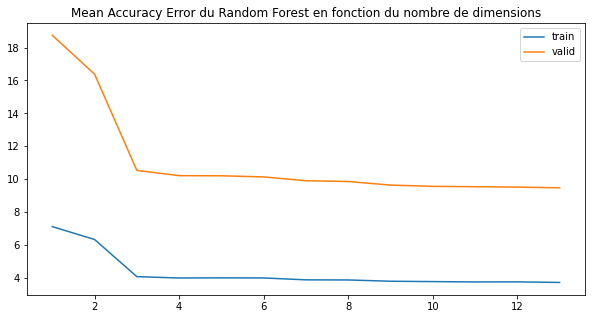

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(nComp_range, train_mae_score_list)
plt.plot(nComp_range, valid_mae_score_list)
ax.legend(labels=['train', 'valid'])
plt.title("Mean Accuracy Error du Random Forest en fonction du nombre de dimensions")
plt.show()

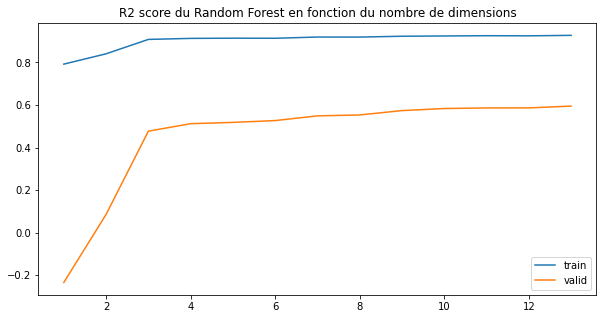

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(nComp_range, train_r2_score_list)
plt.plot(nComp_range, valid_r2_score_list)
ax.legend(labels=['train', 'valid'])
plt.title("R2 score du Random Forest en fonction du nombre de dimensions")
plt.show()

<p style='color:blue'>La PCA nous indique que seulement 3-4 dimensions sont nécessaires pour obtenir le meilleur score. Au-delà le gain est anecdotique. On a donc largement réduit le nombre de dimensions. Cela peut s'expliquer par le fait que des groupes de features se sont fusionnés ensemble, ce qu'on ne pouvait pas voir avec la matrice de corrélation. À noter que l'overfitting entre les courbes d'apprentissage et de validation reste stable quand on dépasse 3 dimensions.</p>

In [26]:
# Réduction à 4 dimensions
preProc = PCA(n_components=4) 
preProc.fit(X_train)
    
# Réduction des données
X_train_Transformed = preProc.transform(X_train)
X_valid_Transformed = preProc.transform(X_valid)
X_test_Transformed = preProc.transform(X_test)

print(X_train_Transformed.shape, X_valid_Transformed.shape, X_test_Transformed.shape)

(107570, 4) (51225, 4) (11953, 4)


<p style='color:blue'>Nous avons réduit à 4 dimensions le jeu de données. Malgré tout, on conserve nos ensembles originaux X_train, X_valid et X_test, pour comparer les résultats avec les ensembles réduits par PCA.</p>

# Sélection du meilleur modèle

In [27]:
# Définition des modèles
model_name = ["Nearest Neighbors", "ElasticNet", "Decision tree",
              "Random Forest", "GradientBoosting"]

model_list = [                                                              
    KNeighborsRegressor(10, n_jobs=-1),                                            
    ElasticNet(random_state=0),                                             
    DecisionTreeRegressor(),                                                
    RandomForestRegressor(n_estimators=10, n_jobs=-1),                                 
    GradientBoostingRegressor(random_state=1, n_estimators=10)]

In [28]:
# Listes des résultats
train_r2_score = list()
valid_r2_score = list()
train_mae_score = list()
valid_mae_score = list()
train_r2_score_PCA = list()
valid_r2_score_PCA = list()
train_mae_score_PCA = list()
valid_mae_score_PCA = list()
y_pred_train = list()
y_pred_valid = list()
y_pred_train_PCA = list()
y_pred_valid_PCA = list()

# Tests des modèles avec et sans la PCA
for i in range(len(model_name)):
    print('modele:', model_name[i])
    M = model_list[i]
    
    # Données sans PCA
    M.fit(X_train, y_train)
    y_pred_train.append(M.predict(X_train))
    y_pred_valid.append(M.predict(X_valid))
    train_r2_score.append(r2_score(y_train, y_pred_train[-1]))
    valid_r2_score.append(r2_score(y_valid, y_pred_valid[-1]))
    train_mae_score.append(mean_absolute_error(y_train, y_pred_train[-1]))
    valid_mae_score.append(mean_absolute_error(y_valid, y_pred_valid[-1]))
    
    # Données avec PCA
    M.fit(X_train_Transformed, y_train)
    y_pred_train_PCA.append(M.predict(X_train_Transformed))
    y_pred_valid_PCA.append(M.predict(X_valid_Transformed))
    train_r2_score_PCA.append(r2_score(y_train, y_pred_train_PCA[-1]))
    valid_r2_score_PCA.append(r2_score(y_valid, y_pred_valid_PCA[-1]))
    train_mae_score_PCA.append(mean_absolute_error(y_train, y_pred_train_PCA[-1]))
    valid_mae_score_PCA.append(mean_absolute_error(y_valid, y_pred_valid_PCA[-1]))

modele: Nearest Neighbors
modele: ElasticNet
modele: Decision tree
modele: Random Forest
modele: GradientBoosting


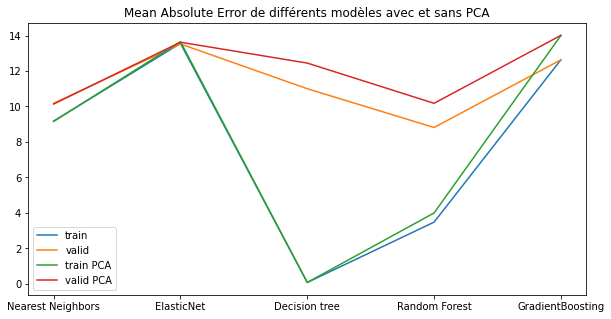

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(model_name, train_mae_score)
plt.plot(model_name, valid_mae_score)
plt.plot(model_name, train_mae_score_PCA)
plt.plot(model_name, valid_mae_score_PCA)
ax.legend(labels=['train', 'valid', "train PCA", "valid PCA"])
plt.title("Mean Absolute Error de différents modèles avec et sans PCA")
plt.show()

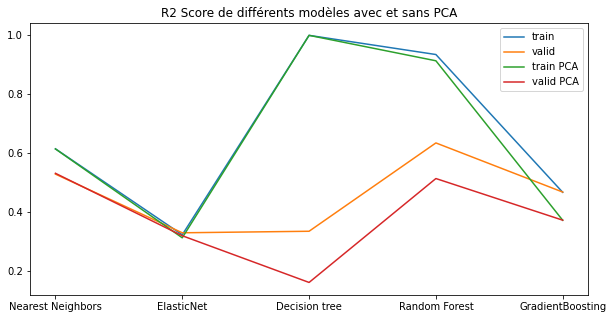

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(model_name, train_r2_score)
plt.plot(model_name, valid_r2_score)
plt.plot(model_name, train_r2_score_PCA)
plt.plot(model_name, valid_r2_score_PCA)
ax.legend(labels=['train', 'valid', "train PCA", "valid PCA"])
plt.title("R2 Score de différents modèles avec et sans PCA")
plt.show()

<p style='color:blue'>Les modèles ayant le meilleur score sur l'entraînement sont le Decision Tree et le Random Forest. Le Decision Tree dépasse de quelques points de score le Random Forest sur l'entraînement. En revanche, le Decision Tree généralise très mal car les résultats sur la validation sont bien en-dessous de ceux obtenus avec le Random Forest. Les autres modèles ont de mauvais score et certains sont en under-fitting. Au final, on choisira le Random Forest qui semble donner les meilleurs résultats sur notre jeu de données. Autre remarque&nbsp;: on obtient des résultats similaires avec et sans PCA pour l'ensemble d'apprentissage. Cependant, sur l'ensemble de validation avec la PCA on généralise moins bien qu'avec toutes les features. La différence est d'environ 10%. Nous allons donc par la suite utiliser le jeu de données transformé par PCA et l'on peut espérer une remontée du score à l'aide de la recherche des hyper-paramètres du Random Forest.</p>

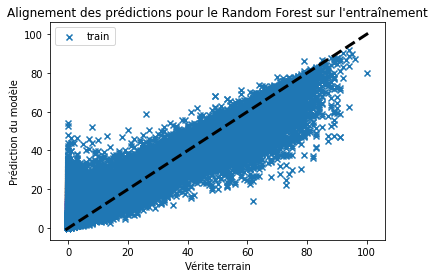

In [31]:
i = model_name.index("Random Forest")
plt.title("Alignement des prédictions pour le Random Forest sur l'entraînement")
xmin= min(y_train.min(), y_pred_train[i].min() )-1
xmax= max(y_train.max(), y_pred_train[i].max() )+1
plt.scatter(y_train, y_pred_train[i], marker='x', label='train')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--')
plt.xlabel('Vérite terrain')
plt.ylabel('Prédiction du modèle') 
plt.legend()
ax.set_aspect('equal') 
plt.show()

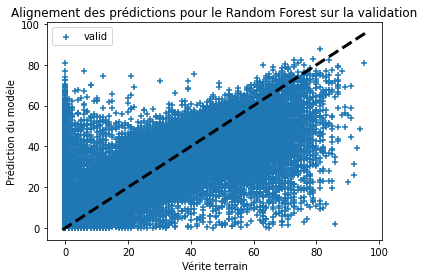

In [32]:
plt.title("Alignement des prédictions pour le Random Forest sur la validation")
xmin= min(y_valid.min(), y_pred_valid[i].min() )-1
xmax= max(y_valid.max(), y_pred_valid[i].max() )+1
plt.scatter(y_valid, y_pred_valid[i], marker='+', label='valid')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--')
plt.xlabel('Vérite terrain')
plt.ylabel('Prédiction du modèle') 
plt.legend()
ax.set_aspect('equal') 
plt.show()

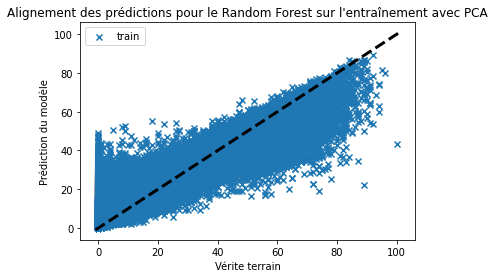

In [33]:
plt.title("Alignement des prédictions pour le Random Forest sur l'entraînement avec PCA")
xmin= min(y_train.min(), y_pred_train_PCA[i].min() )-1
xmax= max(y_train.max(), y_pred_train_PCA[i].max() )+1
plt.scatter(y_train, y_pred_train_PCA[i], marker='x', label='train')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--')
plt.xlabel('Vérite terrain')
plt.ylabel('Prédiction du modèle') 
plt.legend()
ax.set_aspect('equal') 
plt.show()

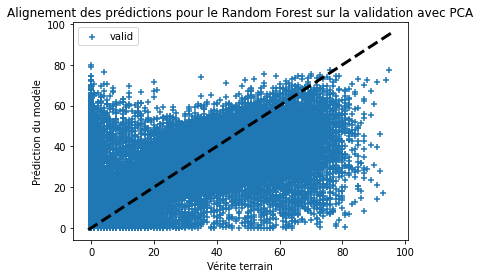

In [34]:
plt.title("Alignement des prédictions pour le Random Forest sur la validation avec PCA")
xmin= min(y_valid.min(), y_pred_valid_PCA[i].min() )-1
xmax= max(y_valid.max(), y_pred_valid_PCA[i].max() )+1
plt.scatter(y_valid, y_pred_valid_PCA[i], marker='+', label='valid')
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--')
plt.xlabel('Vérite terrain')
plt.ylabel('Prédiction du modèle') 
plt.legend()
ax.set_aspect('equal') 
plt.show()

<p style='color:blue'>Ces autres visualisations sous forme de nuage de points confirment les résultats obtenus prédédemment. On remarque que pour les ensembles de validation, les points sont très épars et s'éloignent beaucoup de la droite identité.</p>

# Détermination des meilleurs hyper-paramètres

In [35]:
# Tous les paramètres du Random Forest
M = RandomForestRegressor()
M.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<p style='color:blue'>Dans un premier temps nous allons tracer les courbes d'apprentissage et de validation en fonction des paramètres n_estimators, max_depth, max_features, max_samples, min_samples_split. Ce sont des hyperparamètres numériques donc qui conviennent bien à une visualisation. Pour le reste on pourra utiliser une GridSearch, notamment pour les hyperparamètres catégoriels.</p>

In [36]:
train_score_list = list()
valid_score_list = list()
range_params = [10, 30, 50, 80, 100, 120]
for i in range_params:
    print("n_estimators =", i)
    model = RandomForestRegressor(n_estimators=i, n_jobs=-1)
    model.fit(X_train_Transformed, y_train)
    pred_y = model.predict(X_train_Transformed)
    train_score_list.append(r2_score(y_train, pred_y))
    pred_y = model.predict(X_valid_Transformed)
    valid_score_list.append(r2_score(y_valid, pred_y))

n_estimators = 10
n_estimators = 30
n_estimators = 50
n_estimators = 80
n_estimators = 100
n_estimators = 120


In [37]:
train_score_list, valid_score_list

([0.9126051522755616,
  0.9295550049076893,
  0.9331550218615069,
  0.9350266190029446,
  0.9359325574155319,
  0.9363453106001384],
 [0.5144715072968127,
  0.5412265754999763,
  0.5452510483818296,
  0.5485848470183824,
  0.5489720515143306,
  0.5507999563549106])

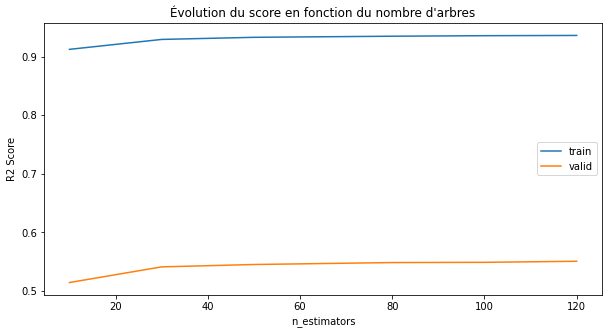

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=range_params, y=train_score_list)
sns.lineplot(x=range_params, y=valid_score_list, ax=ax)
ax.legend(labels=['train', 'valid'])
ax.set_xlabel('n_estimators')
ax.set_ylabel('R2 Score')
plt.title("Évolution du score en fonction du nombre d'arbres")
plt.show()

<p style='color:blue'>On remarque une légère hausse de scrore à partir de 30 arbres, mais autrement les courbes sont très constantes. Ile ne sert à rien d'aller au-delà de 30 arbres, mise à part si on veut perdre du temps et de l'énergie.</p>

In [39]:
train_score_list = list()
valid_score_list = list()
range_params = [5, 10, 20, 30, 40]
for i in range_params:
    print("max_depth =", i)
    model = RandomForestRegressor(max_depth=i, n_jobs=-1)
    model.fit(X_train_Transformed, y_train)
    pred_y = model.predict(X_train_Transformed)
    train_score_list.append(r2_score(y_train, pred_y))
    pred_y = model.predict(X_valid_Transformed)
    valid_score_list.append(r2_score(y_valid, pred_y))

max_depth = 5
max_depth = 10
max_depth = 20
max_depth = 30
max_depth = 40


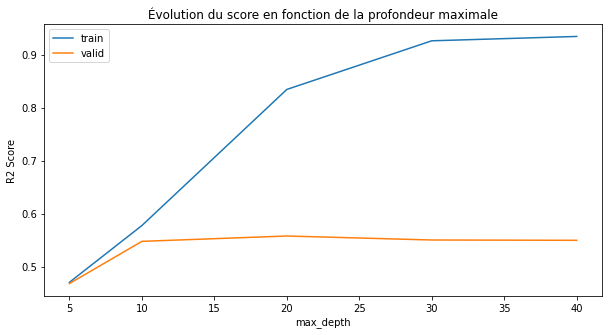

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=range_params, y=train_score_list)
sns.lineplot(x=range_params, y=valid_score_list, ax=ax)
ax.legend(labels=['train', 'valid'])
ax.set_xlabel('max_depth')
ax.set_ylabel('R2 Score')
plt.title("Évolution du score en fonction de la profondeur maximale")
plt.show()

<p style='color:blue'>Par défaut la profondeur maximale n'est pas bornée. Mais on voit qu'on peut la borner à 25-30 car au-delà on ne gagne pas en score d'apprentissage. Le score de validation reste constant entre 10 et 30 de profondeur. Donc même si l'over-fitting augmente, au final le score de validation ne baisse pas.</p>

In [41]:
train_score_list = list()
valid_score_list = list()
# On aura au maximum 4 features
range_params = [1, 2, 3, 4]
for i in range_params:
    print("max_features =", i)
    model = RandomForestRegressor(max_features=i, n_jobs=-1)
    model.fit(X_train_Transformed, y_train)
    pred_y = model.predict(X_train_Transformed)
    train_score_list.append(r2_score(y_train, pred_y))
    pred_y = model.predict(X_valid_Transformed)
    valid_score_list.append(r2_score(y_valid, pred_y))

max_features = 1
max_features = 2
max_features = 3
max_features = 4


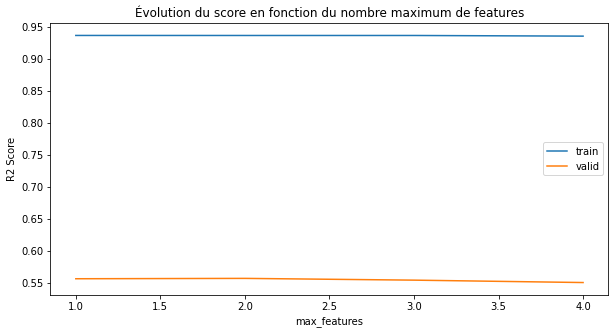

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=range_params, y=train_score_list)
sns.lineplot(x=range_params, y=valid_score_list, ax=ax)
ax.legend(labels=['train', 'valid'])
ax.set_xlabel('max_features')
ax.set_ylabel('R2 Score')
plt.title("Évolution du score en fonction du nombre maximum de features")
plt.show()

<p style="color:blue">  Le nombre maximum de features ne semble rien influencer du tout. On peut donc laisser sur auto qui correspondra à 4 dans notre cas.</p>

In [43]:
train_score_list = list()
valid_score_list = list()
range_params = [0.10, 0.20, 0.50, 0.80, 0.99]
for i in range_params:
    print("max_samples =", i)
    model = RandomForestRegressor(max_samples=i, n_jobs=-1)
    model.fit(X_train_Transformed, y_train)
    pred_y = model.predict(X_train_Transformed)
    train_score_list.append(r2_score(y_train, pred_y))
    pred_y = model.predict(X_valid_Transformed)
    valid_score_list.append(r2_score(y_valid, pred_y))

max_samples = 0.1
max_samples = 0.2
max_samples = 0.5
max_samples = 0.8
max_samples = 0.99


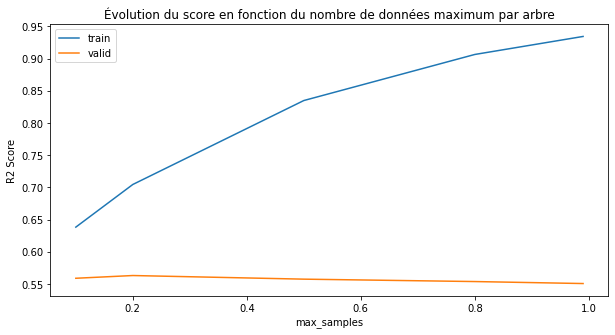

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=range_params, y=train_score_list)
sns.lineplot(x=range_params, y=valid_score_list, ax=ax)
ax.legend(labels=['train', 'valid'])
ax.set_xlabel('max_samples')
ax.set_ylabel('R2 Score')
plt.title("Évolution du score en fonction du nombre de données maximum par arbre")
plt.show()

<p style='color:blue'>On peut laisser à 1.0 c'est-à-dire on utilise tout le jeu de données pour chaque arbre au maximum. Cela fait augmenter le score d'apprentissage et diminuer de manière imperceptible le score de validation.</p>

In [45]:
train_score_list = list()
valid_score_list = list()
range_params = [2, 5, 10, 15, 20]
for i in range_params:
    print("min_samples_split =", i)
    model = RandomForestRegressor(min_samples_split=i, n_jobs=-1)
    model.fit(X_train_Transformed, y_train)
    pred_y = model.predict(X_train_Transformed)
    train_score_list.append(r2_score(y_train, pred_y))
    pred_y = model.predict(X_valid_Transformed)
    valid_score_list.append(r2_score(y_valid, pred_y))

min_samples_split = 2
min_samples_split = 5
min_samples_split = 10
min_samples_split = 15
min_samples_split = 20


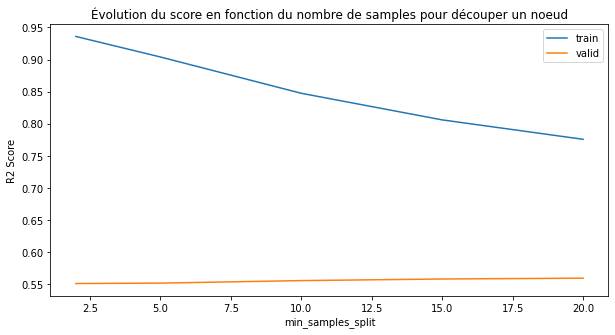

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=range_params, y=train_score_list)
sns.lineplot(x=range_params, y=valid_score_list, ax=ax)
ax.legend(labels=['train', 'valid'])
ax.set_xlabel('min_samples_split')
ax.set_ylabel('R2 Score')
plt.title("Évolution du score en fonction du nombre de samples pour découper un noeud")
plt.show()

<p style='color:blue'>Encore une fois la valeur pas défaut de 2 est correcte.</p>

In [47]:
train_score_list = list()
valid_score_list = list()
range_params = [1,2,3,4,5]
for i in range_params:
    print("min_samples_leaf =", i)
    model = RandomForestRegressor(min_samples_leaf=i, n_jobs=-1)
    model.fit(X_train_Transformed, y_train)
    pred_y = model.predict(X_train_Transformed)
    train_score_list.append(r2_score(y_train, pred_y))
    pred_y = model.predict(X_valid_Transformed)
    valid_score_list.append(r2_score(y_valid, pred_y))

min_samples_leaf = 1
min_samples_leaf = 2
min_samples_leaf = 3
min_samples_leaf = 4
min_samples_leaf = 5


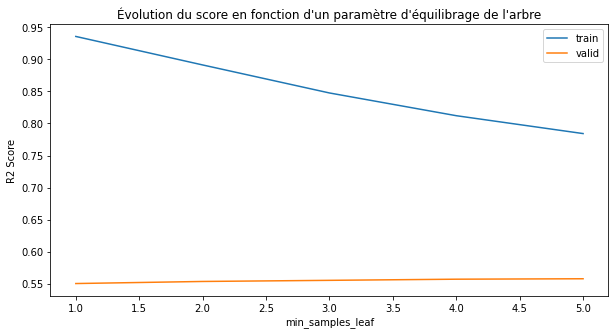

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.lineplot(x=range_params, y=train_score_list)
sns.lineplot(x=range_params, y=valid_score_list, ax=ax)
ax.legend(labels=['train', 'valid'])
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('R2 Score')
plt.title("Évolution du score en fonction d'un paramètre d'équilibrage de l'arbre")
plt.show()

<p style='color:blue'>La valeur par défaut de 1 est aussi correcte. En conclusion le modèle est déjà bien paramétré par défaut pour éviter l'overfitting. Cependant, peut-on encore augmenter le score de validation ? Notre dernière tentative consiste à utiliser la GridSearch pour tester les combinaisons de paramètres catégoriels (ici seulement bootstrap). À noter on ne teste pas random_state car la graine d'initialisation de l'aléatoire n'est pas très pertinente en soit. De plus on ne lance pas criterion='mae' car c'est trop long.</p>

In [49]:
distributions = dict(bootstrap = [True, False])
model = GridSearchCV(RandomForestRegressor(
    criterion="mse",
    n_estimators=30, 
    max_depth=25, 
    max_features=4, 
    max_samples=None, 
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1), distributions, scoring='r2', verbose=2)
search = model.fit(X_train_Transformed, y_train)
search.best_params_ 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .....................................bootstrap=True; total time=   5.9s
[CV] END .....................................bootstrap=True; total time=   4.8s
[CV] END .....................................bootstrap=True; total time=   4.8s
[CV] END .....................................bootstrap=True; total time=   6.1s
[CV] END .....................................bootstrap=True; total time=   5.5s
[CV] END ....................................bootstrap=False; total time=   7.3s
[CV] END ....................................bootstrap=False; total time=   7.3s
[CV] END ....................................bootstrap=False; total time=   7.4s
[CV] END ....................................bootstrap=False; total time=   7.3s
[CV] END ....................................bootstrap=False; total time=   7.4s


{'bootstrap': True}

<p style="color:blue">Au final c'est bootstrap=True qui donne le meilleur résultat. Ce n'est pas étonnant, car c'est ce qui fait la force du Random Forest pour éviter l'over-fitting. Notez bien que GridSearch réalise elle-même une cross-validation en interne. </p>

# Calcul du score de test

In [50]:
model = RandomForestRegressor(
    bootstrap = True,
    criterion="mse",
    n_estimators=30, 
    max_depth=25, 
    max_features=4, 
    max_samples=None, 
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1)
model.fit(X_train_Transformed, y_train)
y_pred_train = model.predict(X_train_Transformed)
y_pred_valid = model.predict(X_valid_Transformed)
y_pred_test = model.predict(X_test_Transformed)
print("r2_score_train =", r2_score(y_train, y_pred_train))
print("r2_score_valid =", r2_score(y_valid, y_pred_valid))
print("r2_score_test =", r2_score(y_test, y_pred_test))
print("mae_train =", mean_absolute_error(y_train, y_pred_train))
print("mae_valid =", mean_absolute_error(y_valid, y_pred_valid))
print("mae_test =", mean_absolute_error(y_test, y_pred_test))

r2_score_train = 0.8976589853268562
r2_score_valid = 0.545086401027418
r2_score_test = 0.5461409937205073
mae_train = 4.636541377545189
mae_valid = 9.925166495216509
mae_test = 9.889915554946347


<p style='color:blue'>Euh pas terrible comme réslultat... On ne pouvait pas faire mieux ? Eh bien si en réalisant un pré-processing un peu rusé !</p>

# Pipeline finale

In [51]:
# Chargement des données
data = pd.read_csv('data/data.csv')
feature = data.columns

In [52]:
data = data.drop(['id', 'name', 'release_date'], axis=1)
feature = feature.drop(['id', 'name', 'release_date'])

In [53]:
# Changement d'échelle
data['duration_ms'] = (data['duration_ms'] / 1000.0).astype(np.int64)

In [54]:
# Renommage colonne duration_ms : duration_s
data.rename(columns={'duration_ms':'duration_s'})

,acousticness,artists,danceability,duration_s,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168,0.224,0,0.000522,5,0.3790,-12.628,0,12,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150,0.517,0,0.026400,5,0.0809,-7.261,0,7,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163,0.186,0,0.000018,0,0.5190,-12.098,1,4,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422,0.798,0,0.801000,2,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165,0.707,1,0.000246,10,0.4020,-6.036,0,2,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147,0.866,0,0.000060,6,0.1780,-5.089,0,0,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144,0.211,0,0.000000,4,0.1960,-11.665,1,0,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218,0.589,0,0.920000,4,0.1130,-12.393,0,0,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244,0.240,1,0.000000,0,0.1130,-12.077,1,69,0.0377,171.319,0.3200,2021


In [55]:
#Binarisation speechiness
data['speechiness'] = (data['speechiness']>0.5).astype(int)

In [56]:
#Binarisation instrumentalness
data['instrumentalness'] = (data['instrumentalness']>0.5).astype(int)

In [57]:
# Suppresion doublons
data = data.drop_duplicates()

<p style='color:blue'>Toute l'astuce est ici, il suffit d'attendre 5 minutes.</p>

In [58]:
# On remplace les artistes par des valeurs numériques 
# représentant leur moyenne de popularité
artistByPopularity = data.groupby('artists')['popularity'].mean()
data = data.replace({'artists': artistByPopularity})

In [59]:
X_train, X_valid, y_train, y_valid = train_test_split(data.drop('popularity', axis=1),
                                         data['popularity'],
                                         test_size = 0.3,
                                         random_state = 8623)
X_train, X_test, y_train, y_test = train_test_split(X_train,
                                         y_train,
                                         test_size = 0.1,
                                         random_state = 8623)
print('X_train: ', X_train.shape)
print('X_valid: ', X_valid.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_valid: ', y_valid.shape)
print('y_test: ', y_test.shape)

X_train:  (107685, 15)
X_valid:  (51280, 15)
X_test:  (11966, 15)
y_train:  (107685,)
y_valid:  (51280,)
y_test:  (11966,)


In [60]:
# Réduction à 4 dimensions
preProc = PCA(n_components=4) 
preProc.fit(X_train)
    
# Réduction des données
X_train_Transformed = preProc.transform(X_train)
X_valid_Transformed = preProc.transform(X_valid)
X_test_Transformed = preProc.transform(X_test)

In [61]:
model = RandomForestRegressor(
    bootstrap = True,
    criterion="mse",
    n_estimators=30, 
    max_depth=25, 
    max_features=4, 
    max_samples=None, 
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1)
model.fit(X_train_Transformed, y_train)
y_pred_train = model.predict(X_train_Transformed)
y_pred_valid = model.predict(X_valid_Transformed)
y_pred_test = model.predict(X_test_Transformed)
print("r2_score_train =", r2_score(y_train, y_pred_train))
print("r2_score_valid =", r2_score(y_valid, y_pred_valid))
print("r2_score_test =", r2_score(y_test, y_pred_test))
print("mae_train =", mean_absolute_error(y_train, y_pred_train))
print("mae_valid =", mean_absolute_error(y_valid, y_pred_valid))
print("mae_test =", mean_absolute_error(y_test, y_pred_test))

r2_score_train = 0.9739580383826051
r2_score_valid = 0.8477865650535681
r2_score_test = 0.8512888359406765
mae_train = 2.210455990118487
mae_valid = 5.431434065921588
mae_test = 5.380683141102598


<p style="color:blue">C'est nettement mieux avec cette technique, on généralise bien mieux !!! De plus le score sur l'ensemble d'entraînement est lègèrement réhaussé. On n'a pas changé le restant du pré-processing, ni les hyper-paramètres du modèle. De plus, on a fait la même PCA qui réduit à 4 dimensions.</p>